In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


C:\Users\B Vasundhara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the data to include a single channel (for grayscale images)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)


In [3]:
model = Sequential()

# First Convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten and Fully Connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [4]:
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
375/375 [==============================] - 18s 45ms/step - loss: 0.3309 - accuracy: 0.8992 - val_loss: 0.0750 - val_accuracy: 0.9782
Epoch 2/5
375/375 [==============================] - 17s 45ms/step - loss: 0.1036 - accuracy: 0.9697 - val_loss: 0.0532 - val_accuracy: 0.9845
Epoch 3/5
375/375 [==============================] - 18s 47ms/step - loss: 0.0744 - accuracy: 0.9787 - val_loss: 0.0455 - val_accuracy: 0.9864
Epoch 4/5
375/375 [==============================] - 18s 49ms/step - loss: 0.0623 - accuracy: 0.9809 - val_loss: 0.0408 - val_accuracy: 0.9877
Epoch 5/5
375/375 [==============================] - 19s 51ms/step - loss: 0.0534 - accuracy: 0.9836 - val_loss: 0.0391 - val_accuracy: 0.9883


In [5]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


313/313 [==============================] - 1s 4ms/step - loss: 0.0309 - accuracy: 0.9903
Test Loss: 0.030862316489219666
Test Accuracy: 0.9902999997138977


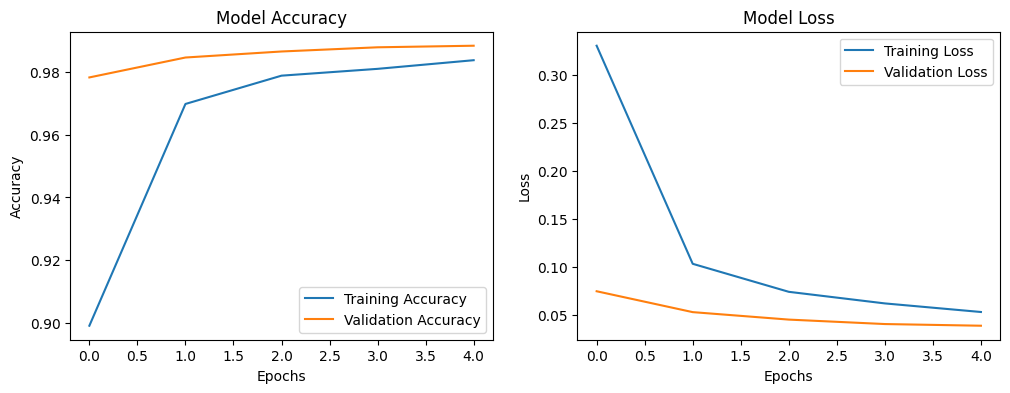

In [6]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


313/313 [==============================] - 1s 3ms/step


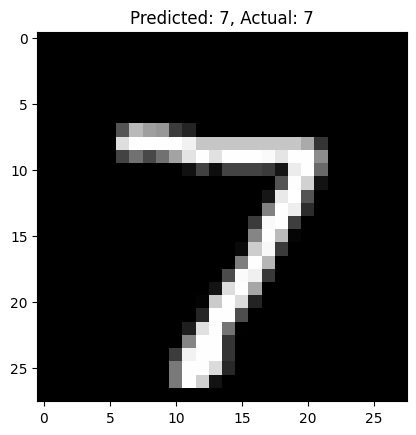

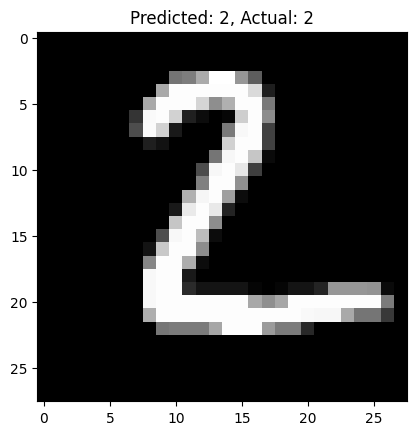

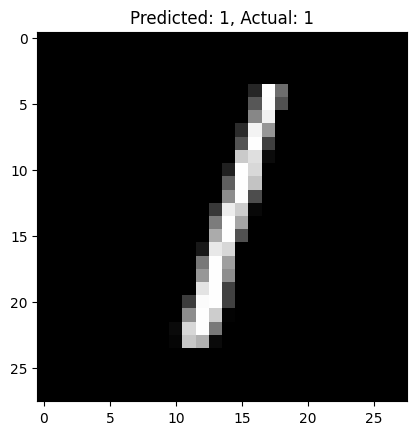

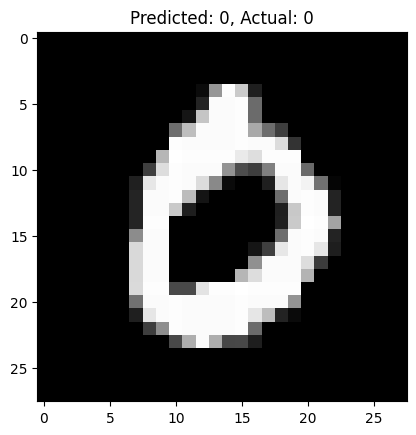

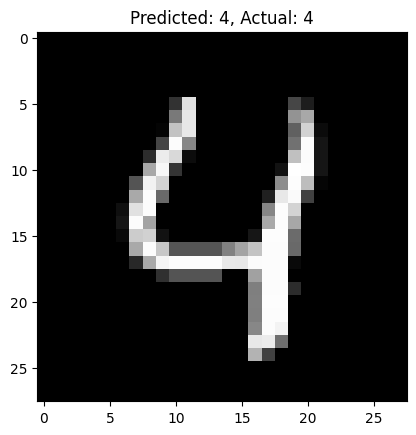

In [7]:
# Predict on the test set
predictions = model.predict(X_test)

# Display some predictions
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test[i])}")
    plt.show()
